In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Step1: Understang data and data loading

In [3]:
# Read the data from csv
data = pd.read_csv("day.csv")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 88.5+ KB


In [5]:
data.shape

(730, 16)

In [6]:
# Check for null values
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
# Check duplicate values
data_dup = data.copy()
data_dup.drop_duplicates(subset=None, inplace=True)
data_dup.shape

(730, 16)

In [8]:
# No dupes found

In [9]:
# Check for unique values
data.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

In [10]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [11]:
# dropping unique columns
# instant - index  to be removed
# dteday - column month has same data

data.drop(columns=['instant', 'dteday'],inplace=True)
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [12]:
data.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [13]:
# Step2: Data Pre process step

In [14]:
data.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

In [15]:
# Map the values
data['season'] = data['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
data['mnth'] = data['mnth'].map({1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'})
data['weekday'] = data['weekday'].map({0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'})
data['weathersit'] = data['weathersit'].map({ 1: 'Clear',2: 'Mist',3: 'Light Snow',4: 'Heavy Rain'})
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,Spring,0,January,0,Saturday,0,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,Spring,0,January,0,Sunday,0,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,Spring,0,January,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,Spring,0,January,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,Spring,0,January,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  casual      730 non-null    int64  
 12  registered  730 non-null    int64  
 13  cnt         730 non-null    int64  
dtypes: float64(4), int64(6), object(4)
memory usage: 68.5+ KB


In [17]:
# Converting variables type to categorical
data[['season', 'mnth','weathersit']] =data[['season', 'mnth', 'weathersit']].astype("category")

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    object  
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  casual      730 non-null    int64   
 12  registered  730 non-null    int64   
 13  cnt         730 non-null    int64   
dtypes: category(3), float64(4), int64(6), object(1)
memory usage: 62.5+ KB


In [19]:
# Change variable type
data[['temp','hum','windspeed','cnt']]=data[['temp','hum','windspeed','cnt']].apply(pd.to_numeric)

In [20]:
# Step:3 EDA

In [21]:
# Univariate analysis
#For categorical varaible -Box plot againt target varaible (cnt)

In [22]:
import piplite
await piplite.install('seaborn')

In [23]:
# import to visualize data
import matplotlib.pyplot as plt
import seaborn as sns

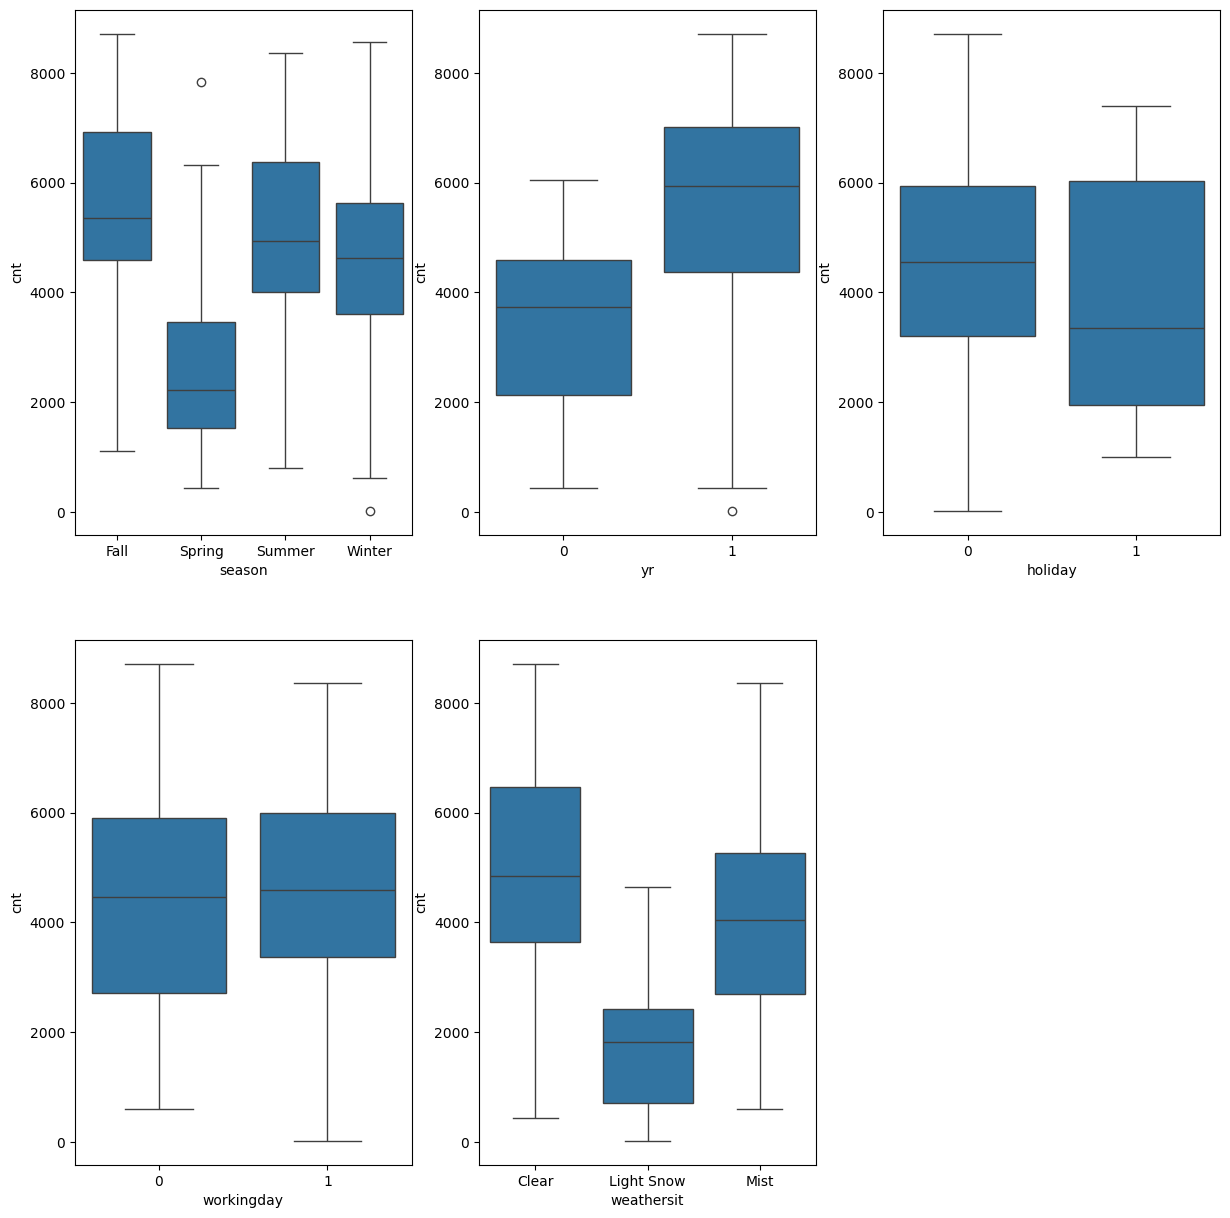

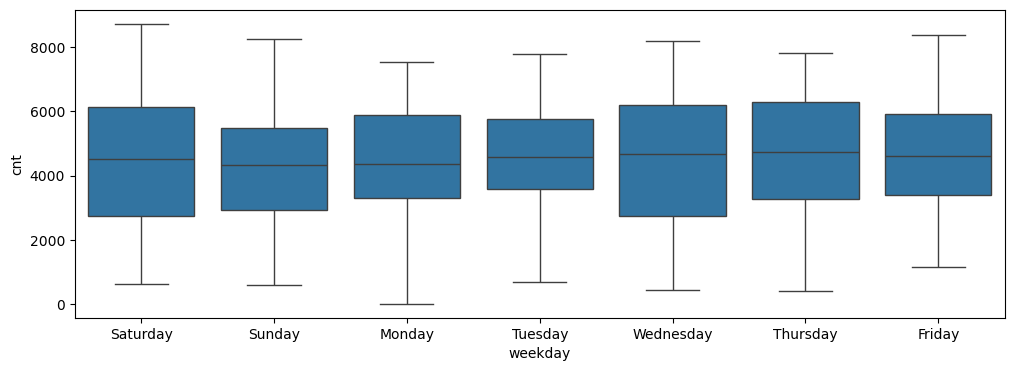

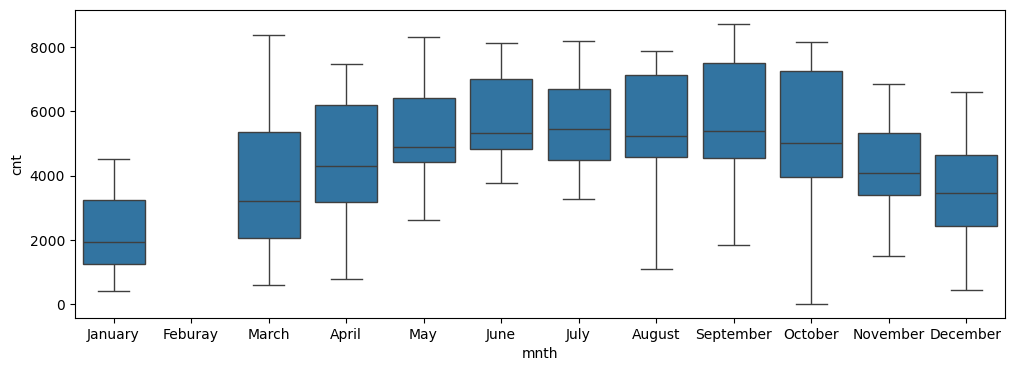

In [24]:

plt.figure(figsize=(20, 15))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = data, patch_artist=True)
plt.subplot(2,4,2)
sns.boxplot(x = 'yr', y = 'cnt', data = data)
plt.subplot(2,4,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = data)
plt.subplot(2,4,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = data)
plt.subplot(2,4,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = data)
plt.show()
fig,ax = plt.subplots()
fig.set_size_inches((12,4))
sns.boxplot(x='weekday',y='cnt',data=data)
plt.show()
order = ['January', 'Feburay', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October' , 'November', 'December']
data['mnth'] = pd.Categorical(data['mnth'], categories = order, ordered=True)
fig,ax = plt.subplots()
fig.set_size_inches((12,4))
sns.boxplot(x='mnth',y='cnt',data=data)
plt.show()

In [25]:
# Draw Line graph count vs months for both years

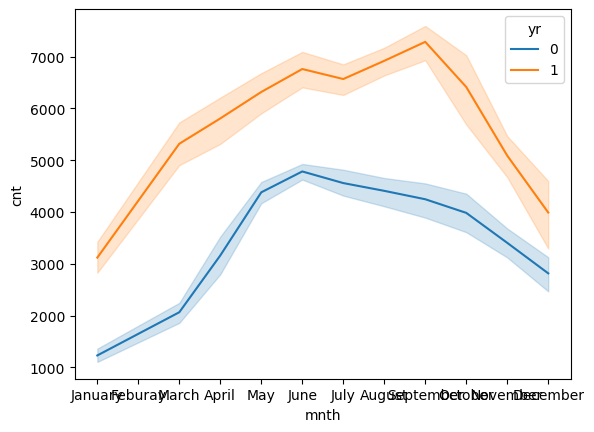

In [26]:
sns.lineplot (x="mnth", y="cnt", data=data, hue="yr")
plt.show()

In [27]:
# Analysis:
# Graph increased in next year than prevvious
#High demand in year 2019 (year-1) than 2018 (year-0)


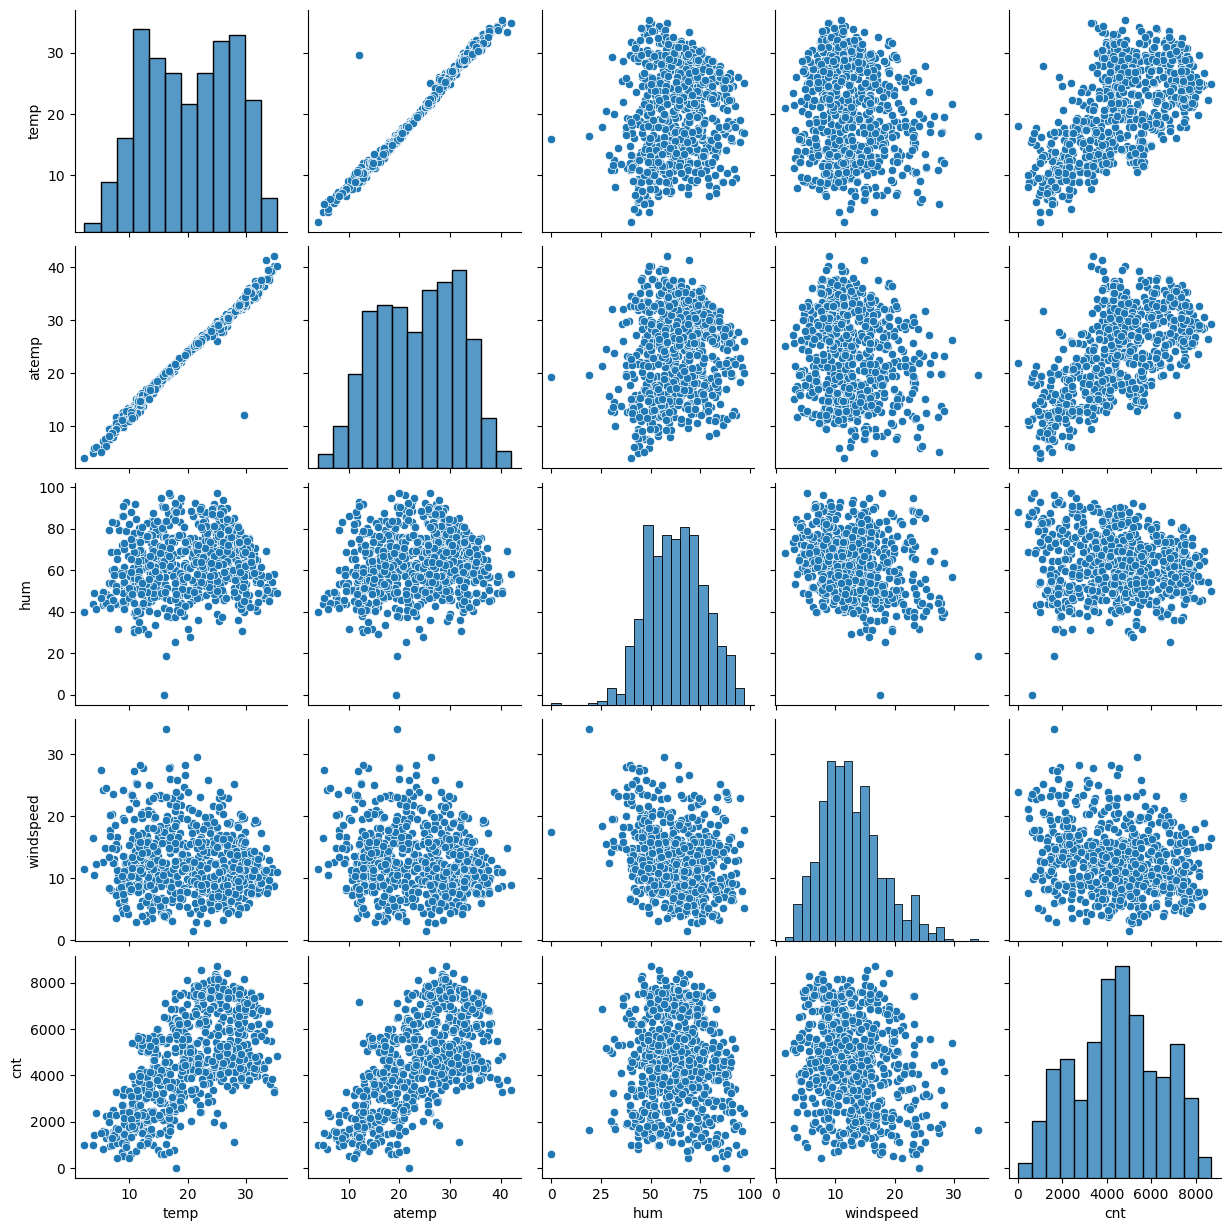

In [28]:
#pairplot for numeric variables
sns.pairplot(data,vars=["temp","atemp","hum","windspeed","cnt"])

In [29]:
#Parir plot - analysis
#linealy dependecy between temp, atemp and count
# atemp and temp are highly correlated

In [30]:
# Biavariate analysis

In [31]:
def plot_bar_graphs(column):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.barplot(x=column, y='cnt', data=data)
    plt.title(f'Bar Plot of {column} vs cnt')
    
    plt.subplot(1, 2, 2)
    sns.barplot(x=column, y='cnt', data=data, hue='yr', palette='Set1')
    plt.title(f'Bar Plot of {column} vs cnt (2018 vs 2019)')
    plt.legend(title='yr', labels=['2018', '2019'])
    
    plt.tight_layout()
    plt.show()

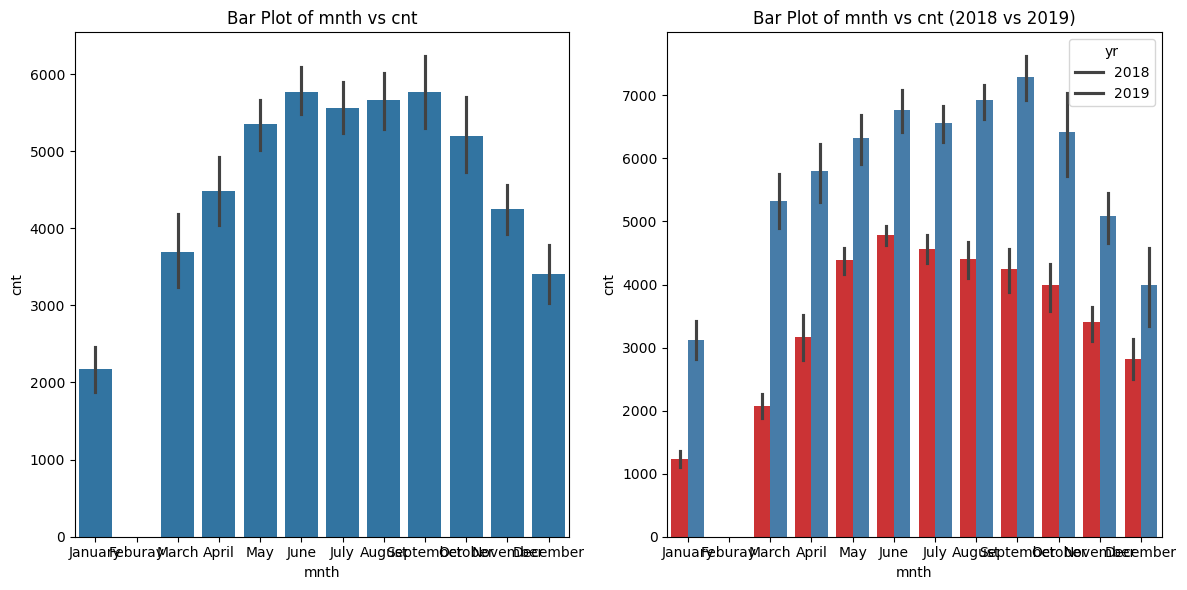

In [32]:
plot_bar_graphs('mnth')

In [33]:
# bike regis increased in year 2019 each month from year 2018
# May june, july, aug, sept, oct have high rentals

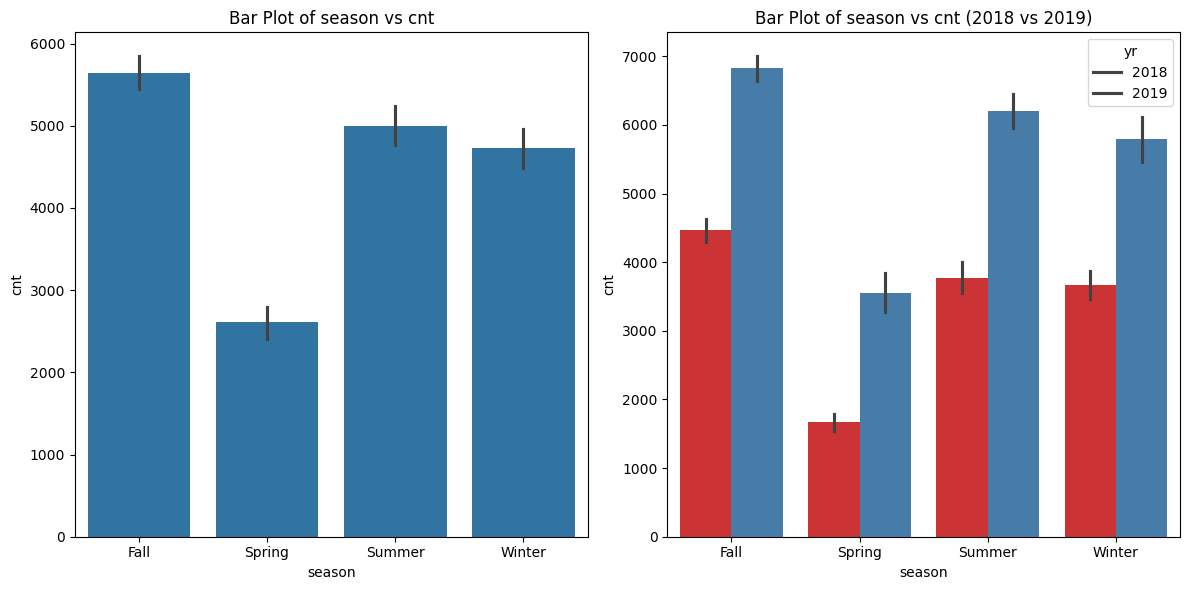

In [34]:
plot_bar_graphs('season')

In [35]:
# Analysis: # Fall season have high rentals

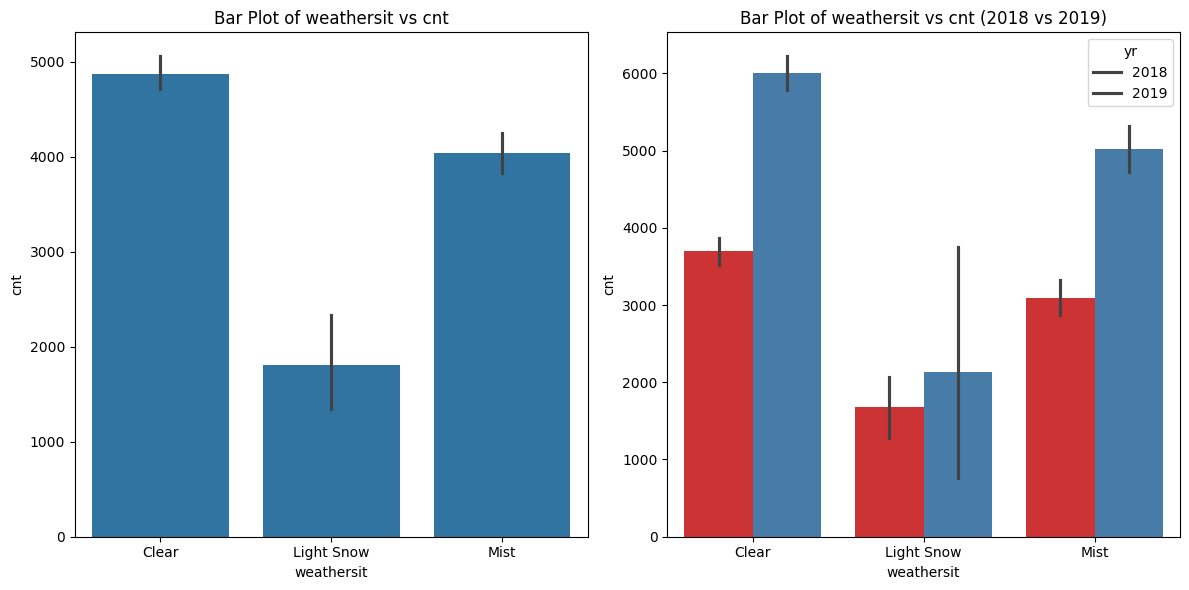

In [36]:
plot_bar_graphs('weathersit')

In [37]:
#rental increase in clear weather

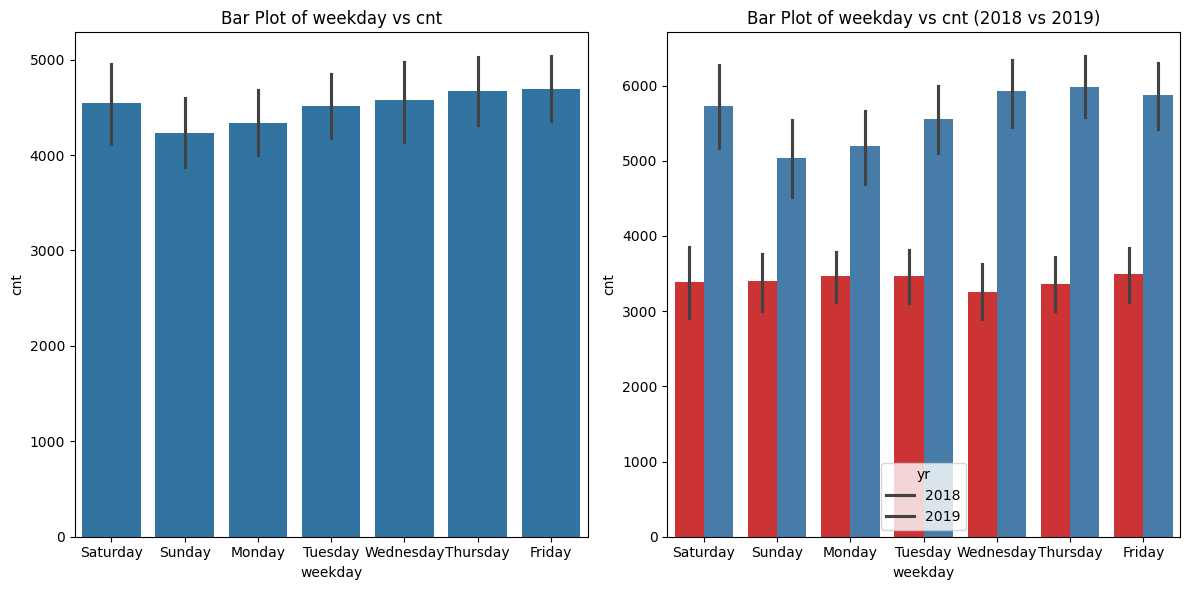

In [38]:
plot_bar_graphs('weekday')

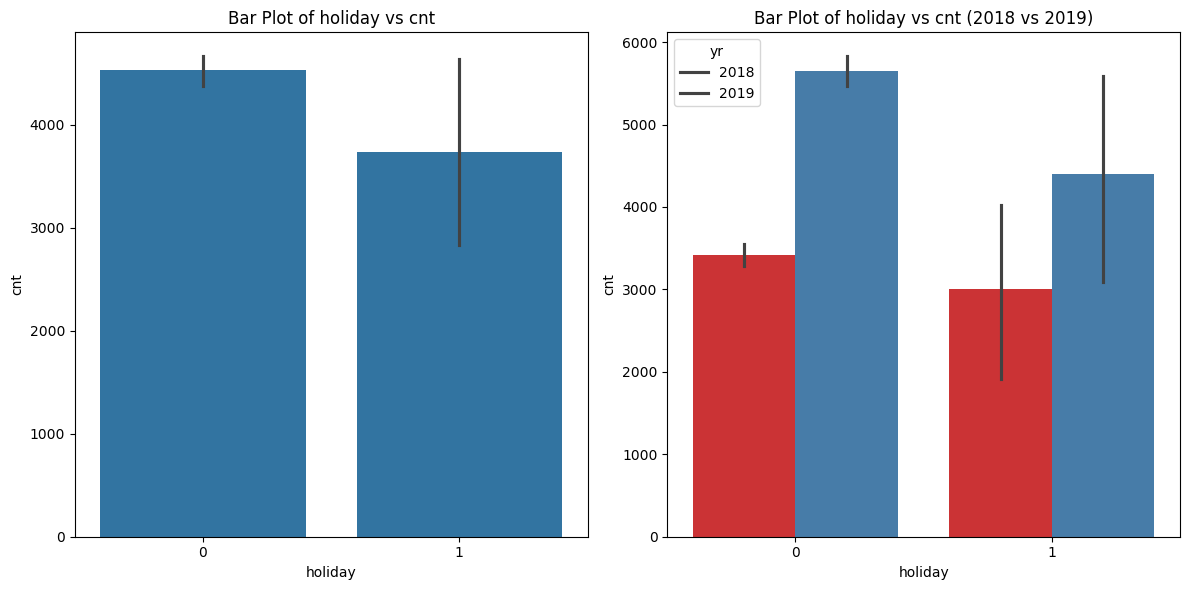

In [39]:
plot_bar_graphs('holiday')

In [40]:
# Analysis: #bike rentals are less on weekdays

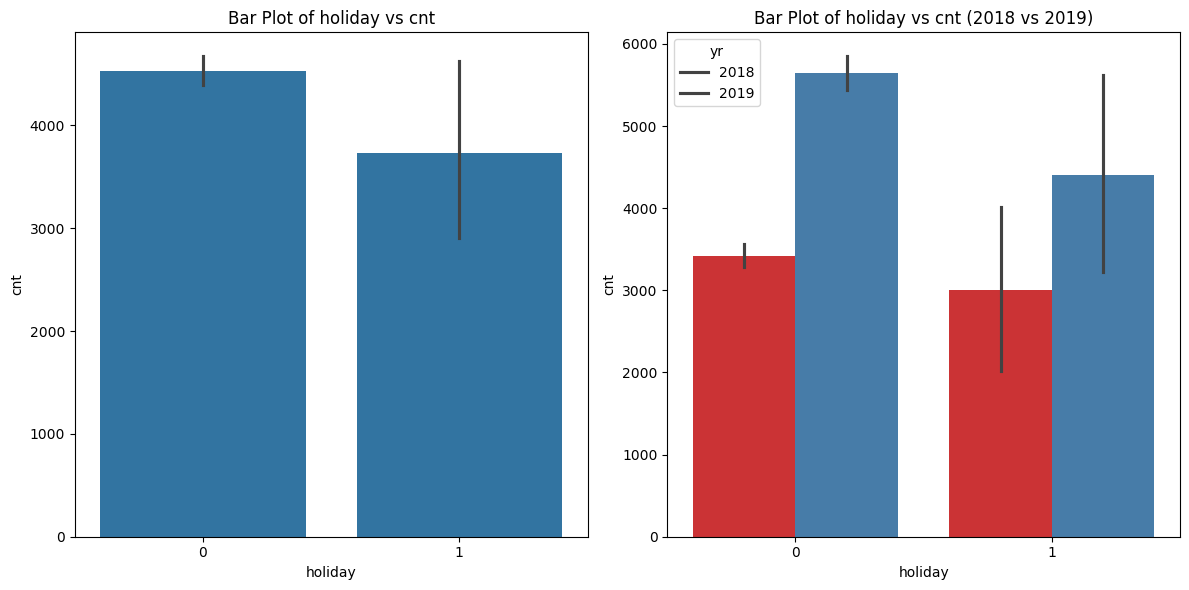

In [41]:
plot_bar_graphs('holiday')

In [42]:
# renting ont prefered on holiday

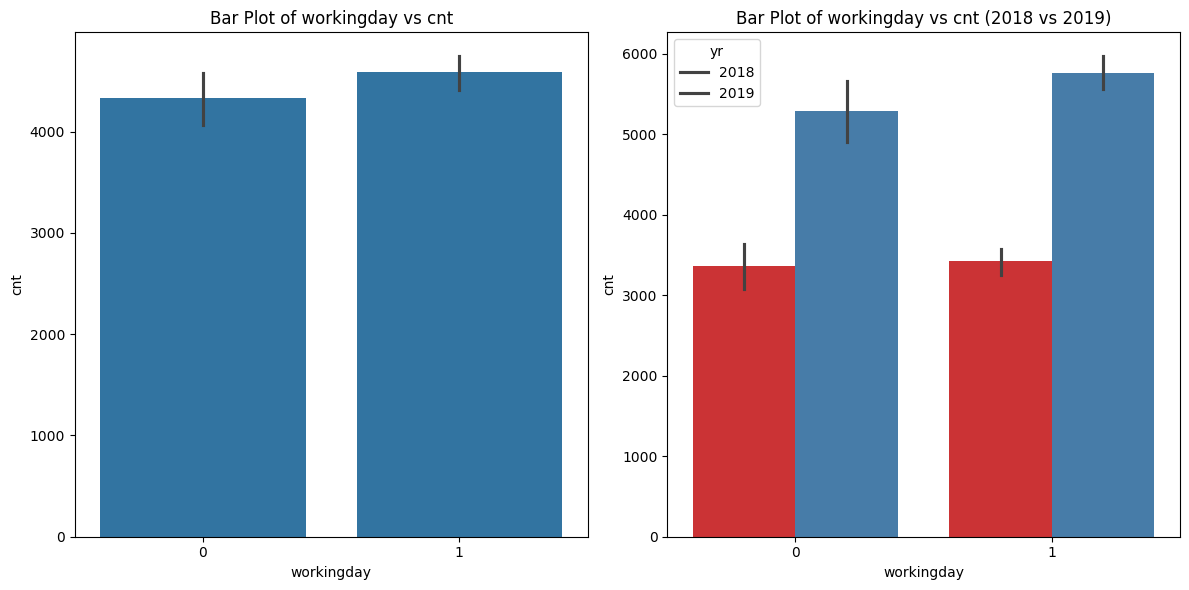

In [43]:
plot_bar_graphs('workingday')

In [44]:
# Analysis: # People Prefers rentals on working days

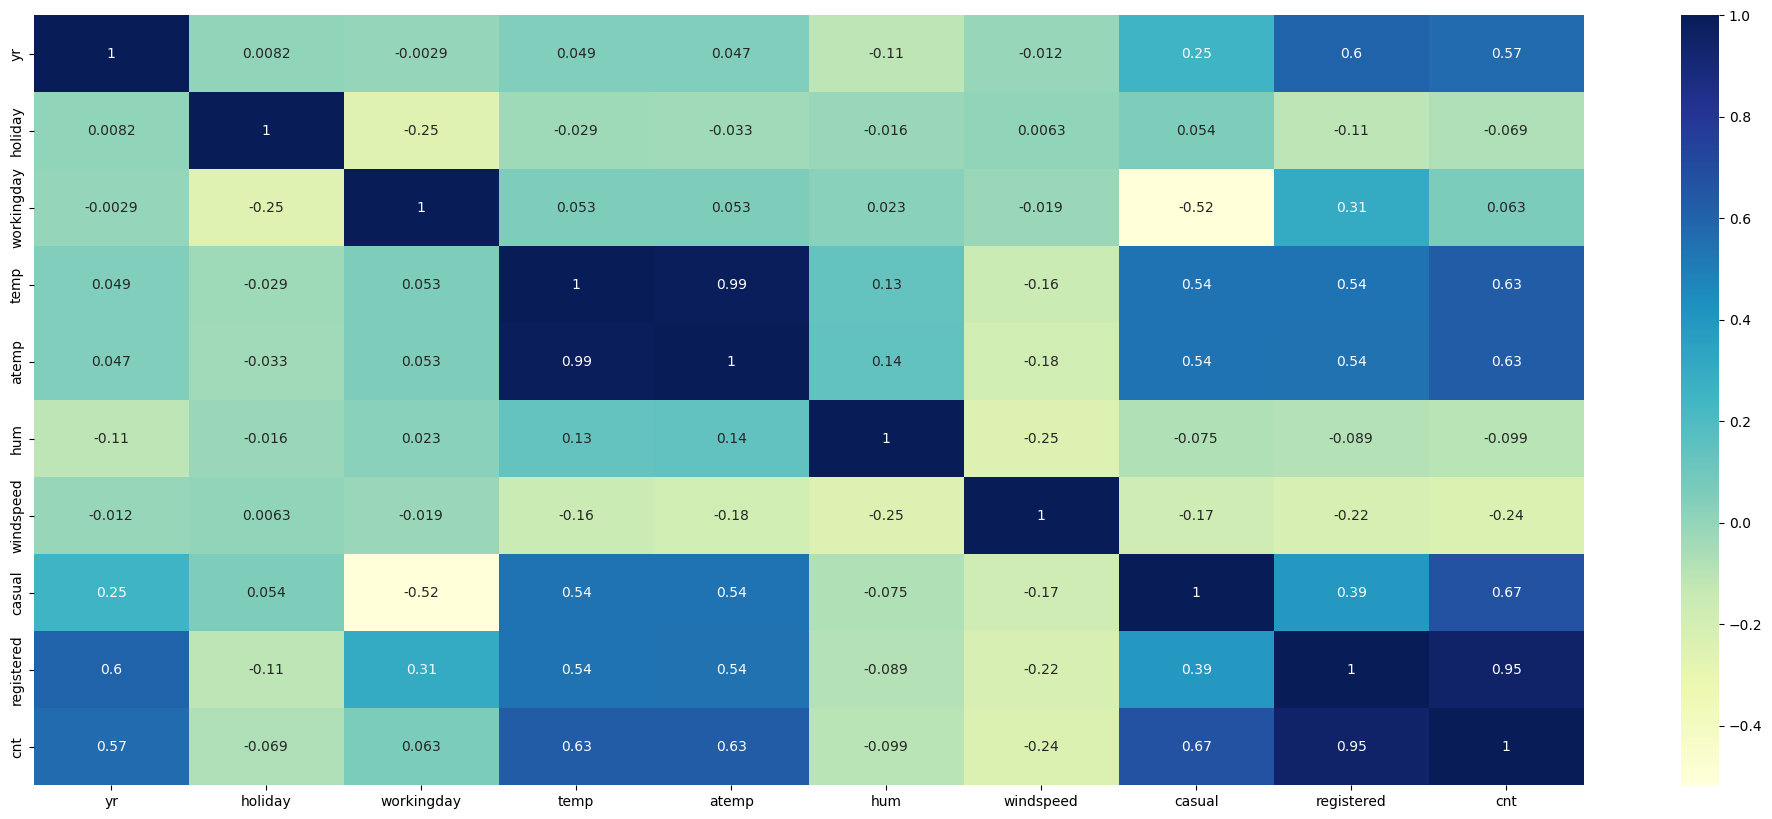

In [45]:
# Draw heatmap to find correlation
plt.figure(figsize=(25,10))
sns.heatmap(data.corr(), cmap='YlGnBu', annot = True)
plt.show()

In [46]:
#1. Holidayz, humidity, windspwwd are negatively correlated
#2. cnt is sum of casual and registed. T
#3. Indepedent variable temp and atemp is highly correlated(0.99).
#4. Possiblity that one may have derived from another
#5.  Will use VIP and p values to drop this.

In [47]:
# Drop the data which are not required from the given problem
    # casual registered=cnt  and cnt is target variable
data.drop(columns=['casual','registered'],inplace=True)
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,January,0,Saturday,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,January,0,Sunday,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,January,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,January,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,January,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [48]:
# Data Prepartion

In [49]:
# Dummy variables creation
season_dum = pd.get_dummies(data['season'],drop_first=True)
mnth_dum = pd.get_dummies(data['mnth'],drop_first=True)
weekday_dum = pd.get_dummies(data['weekday'],drop_first=True)
weathersit_dum = pd.get_dummies(data['weathersit'],drop_first=True)



In [50]:
# Adding new variable columns .
data = pd.concat([data,season_dum,mnth_dum,weekday_dum,weathersit_dum],axis=1)
#Dropping original columns
data.drop(columns=['season','mnth','weekday','weathersit'],inplace=True)

In [51]:
data.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,November,December,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Mist
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   workingday  730 non-null    int64  
 3   temp        730 non-null    float64
 4   atemp       730 non-null    float64
 5   hum         730 non-null    float64
 6   windspeed   730 non-null    float64
 7   cnt         730 non-null    int64  
 8   Spring      730 non-null    uint8  
 9   Summer      730 non-null    uint8  
 10  Winter      730 non-null    uint8  
 11  Feburay     730 non-null    uint8  
 12  March       730 non-null    uint8  
 13  April       730 non-null    uint8  
 14  May         730 non-null    uint8  
 15  June        730 non-null    uint8  
 16  July        730 non-null    uint8  
 17  August      730 non-null    uint8  
 18  September   730 non-null    uint8  
 19  October     730 non-null    u

In [53]:
# Step-4: Train-test split

In [54]:
# Import function
from sklearn.model_selection import train_test_split

np.random.seed(0)
data_train, data_test = train_test_split(data, train_size = 0.8, test_size = 0.2, random_state = 100)

data_test.shape

(146, 30)

In [55]:
# Step-6 Rescaling data

In [56]:
# MinMax scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [57]:
data_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,November,December,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Mist
367,1,0,1,6.150000,6.31375,44.1250,24.499957,2236,1,0,...,0,0,0,0,0,0,1,0,0,0
648,1,0,1,17.835000,21.55835,46.3333,12.166932,7570,0,0,...,0,0,0,0,0,1,0,0,0,0
44,0,0,1,17.015000,19.91750,37.5833,27.999836,1913,1,0,...,0,0,1,0,0,0,0,0,0,0
705,1,0,1,13.154153,16.09790,76.4167,8.750200,5008,0,0,...,0,1,0,0,0,0,0,0,0,1
379,1,0,0,6.833347,8.08125,41.9167,16.834286,2311,1,0,...,0,0,0,0,1,0,0,0,0,0


In [58]:
# Apply scaler() to all the numeric variables

num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
data_train[num_vars] = scaler.fit_transform(data_train[num_vars])

In [59]:
data_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,November,December,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Mist
367,1,0,1,0.113228,0.061963,0.454701,0.695175,0.254717,1,0,...,0,0,0,0,0,0,1,0,0,0
648,1,0,1,0.468352,0.462175,0.477458,0.299450,0.868385,0,0,...,0,0,0,0,0,1,0,0,0,0
44,0,0,1,0.443431,0.419099,0.387290,0.807474,0.217556,1,0,...,0,0,1,0,0,0,0,0,0,0
705,1,0,1,0.326094,0.318824,0.787463,0.189819,0.573631,0,0,...,0,1,0,0,0,0,0,0,0,1
379,1,0,0,0.133996,0.108365,0.431945,0.449210,0.263346,1,0,...,0,0,0,0,1,0,0,0,0,0


In [60]:
data.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,November,December,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Mist
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849,0.246575,0.252055,...,0.082192,0.084932,0.143836,0.143836,0.143836,0.142466,0.142466,0.141096,0.028767,0.336986
std,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647,0.431313,0.434490,...,0.274845,0.278971,0.351164,0.351164,0.351164,0.349767,0.349767,0.348359,0.167266,0.473004
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [61]:
# numeric variabels has scaled between 0 and 1.

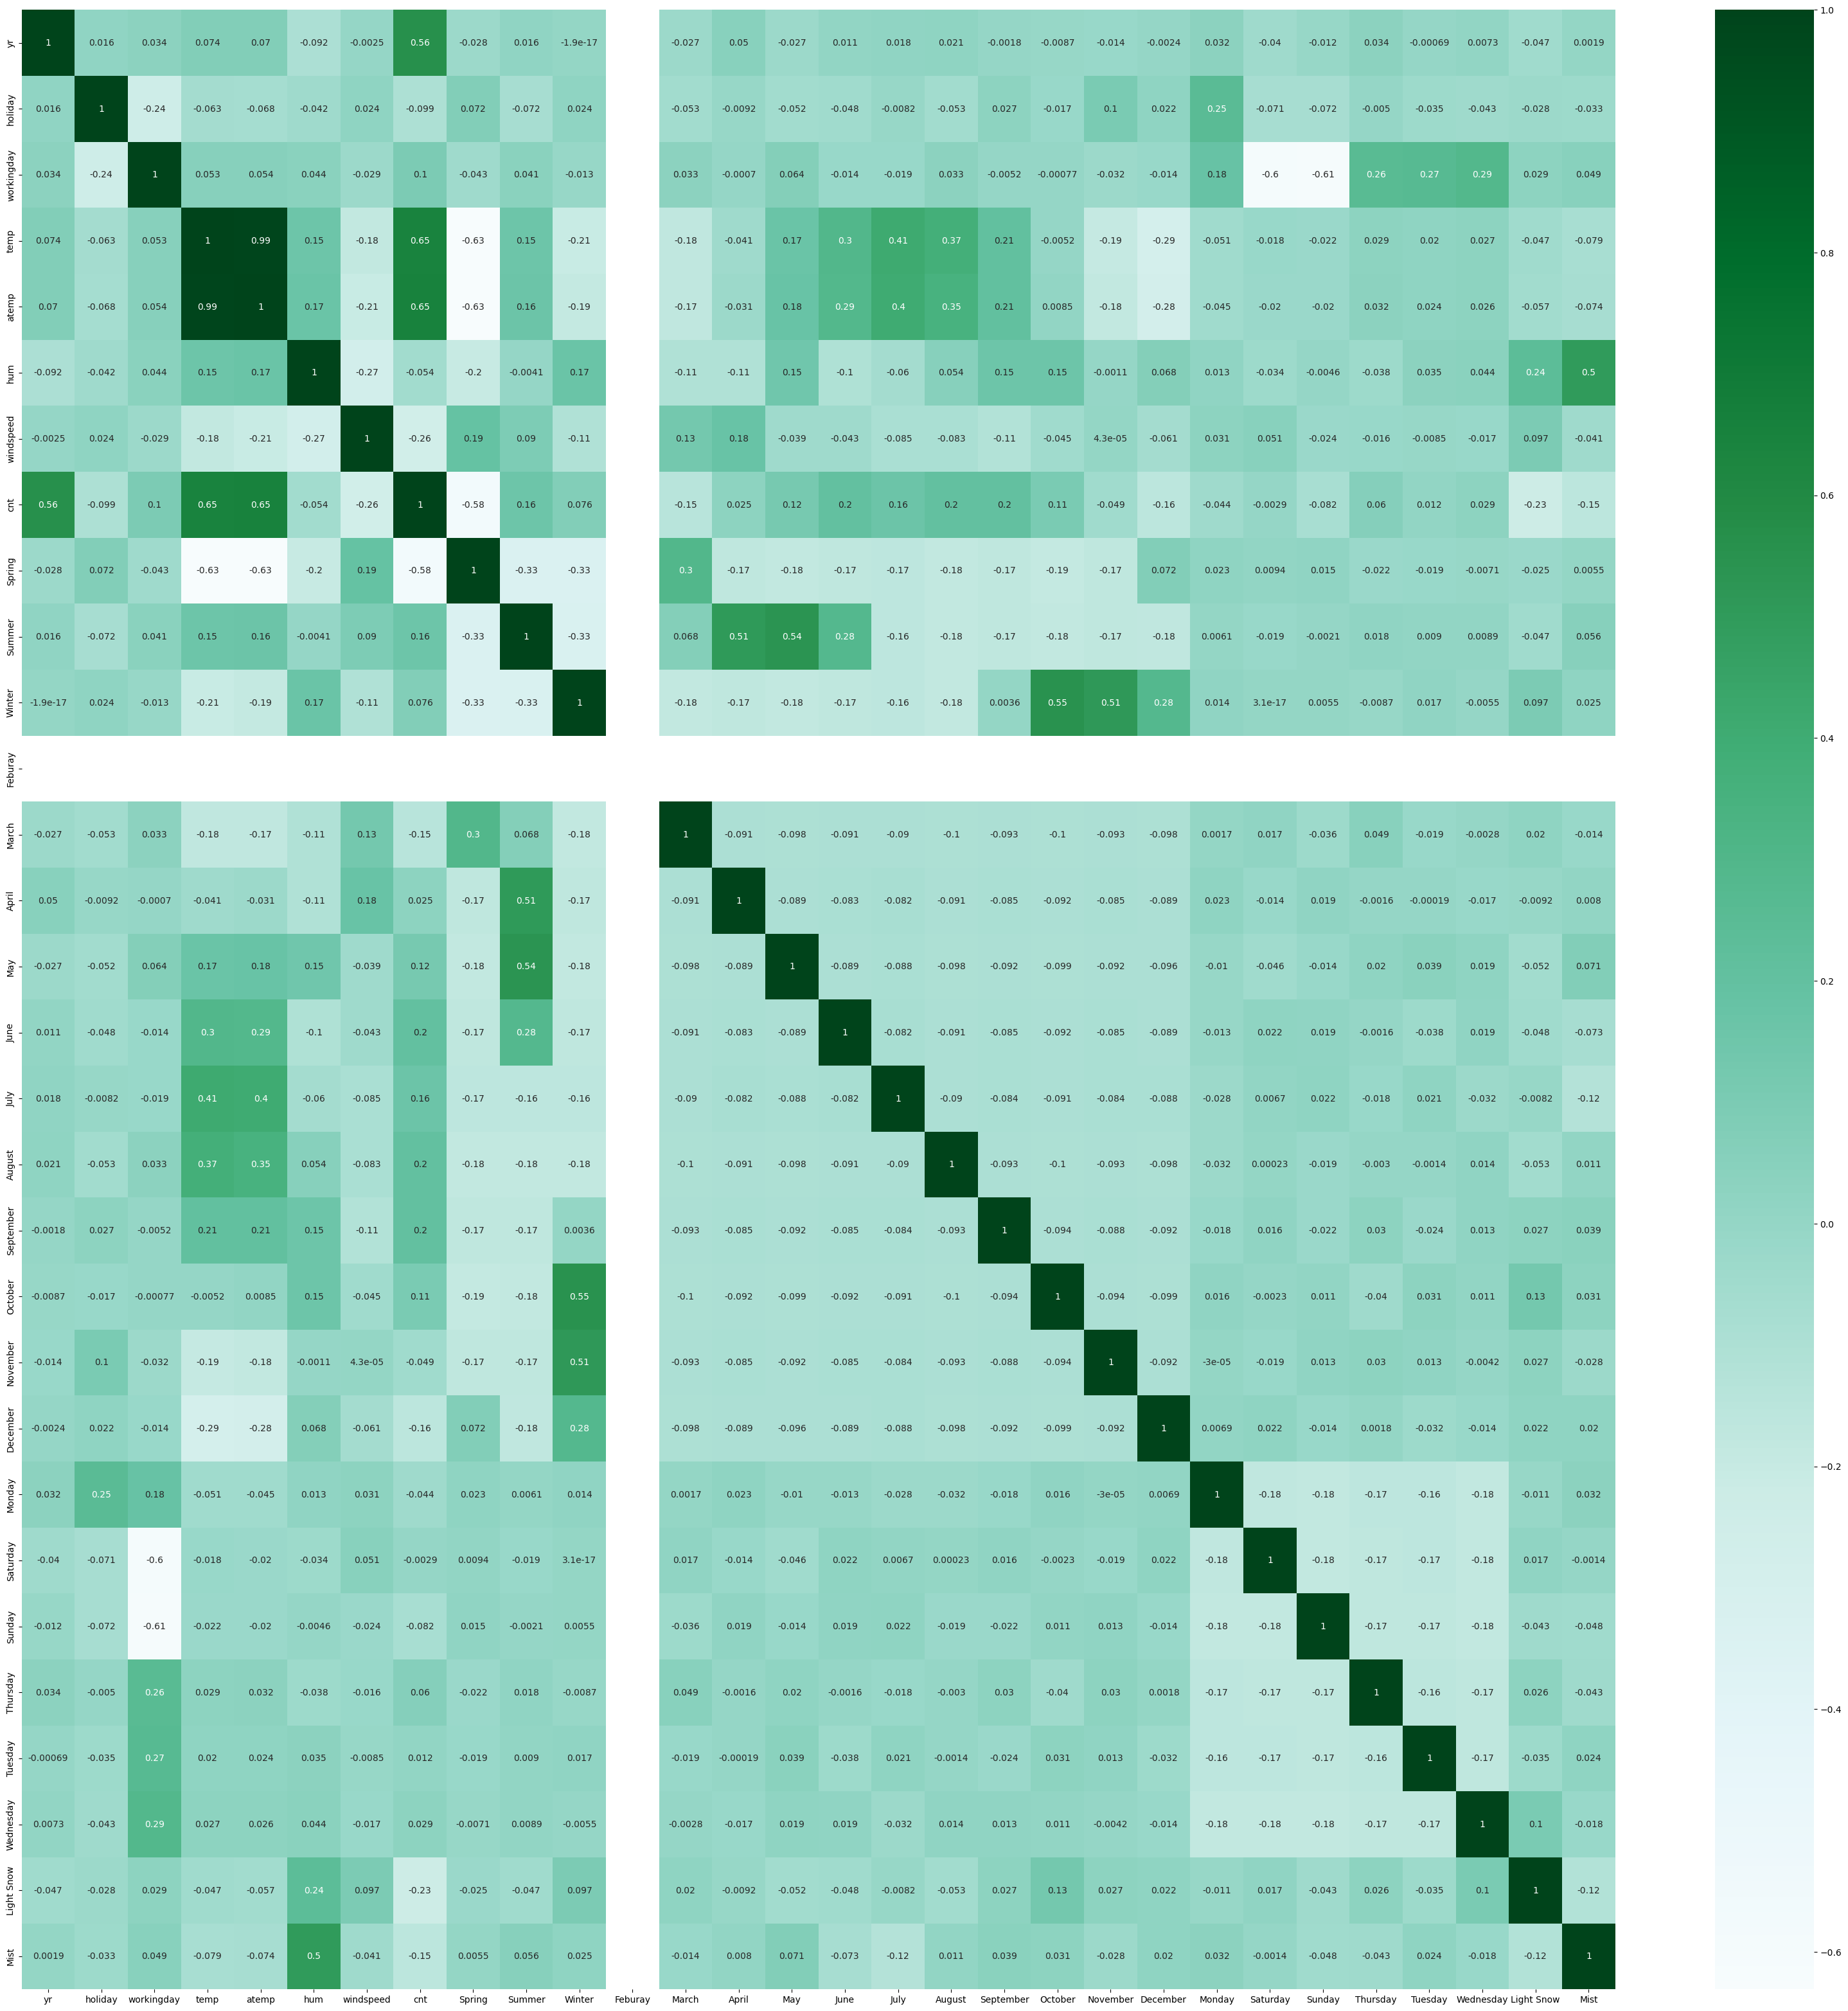

In [62]:
# Plotting a correlation matrix
plt.figure(figsize = (40, 40))
sns.heatmap(data_train.corr(), annot = True, cmap="BuGn")
plt.show()

In [63]:
# poping seperating independent and dependent variables
y_train=data_train.pop('cnt')
X_train=data_train

In [64]:
# Step 8: Model Building

In [65]:
#Model #1

In [66]:
# Building a model with all features using statsmodels :
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)
lr1 = sm.OLS(y_train, X_train_lm).fit()
lr1.params

const         2.031888e-01
yr            2.288706e-01
holiday      -1.246710e-03
workingday    9.061572e-02
temp          3.900716e-01
atemp         7.472058e-02
hum          -1.485694e-01
windspeed    -1.768517e-01
Spring       -5.531200e-02
Summer        4.263405e-02
Winter        1.089393e-01
Feburay       1.796753e-16
March         4.552628e-02
April         4.105956e-02
May           5.856044e-02
June          4.878696e-02
July          4.150400e-03
August        5.758098e-02
September     1.183140e-01
October       5.495476e-02
November     -6.575499e-03
December     -7.400499e-03
Monday       -2.499470e-02
Saturday      8.690244e-02
Sunday        2.691732e-02
Thursday     -1.077097e-02
Tuesday      -2.296042e-02
Wednesday    -7.533672e-03
Light Snow   -2.601973e-01
Mist         -5.867519e-02
dtype: float64

In [67]:
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     124.3
Date:                Wed, 29 May 2024   Prob (F-statistic):          1.08e-215
Time:                        22:25:34   Log-Likelihood:                 611.87
No. Observations:                 584   AIC:                            -1168.
Df Residuals:                     556   BIC:                            -1045.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2032      0.031      6.584      0.000       0.143       0.264
yr             0.2289      0.007     30.996      0.000       0.214       0.243
holiday       -0.0012      0.021     -0.059      0.953      -0.043       0.040
workingday     0.0906      0.011      8.195      0.000       0.069       0.112
temp           0.3901      0.135      2.881      0.004       0.124       0.656
atemp          0.0747      0.133      0.560      0.576      -0.187       0.337
hum           -0.1486      0.036     -4.114      0.000      -0.220      -0.078
windspeed     -0.1769      0.024     -7.266      0.000      -0.225      -0.129
Spring        -0.0553      0.027     -2.027      0.043      -0.109      -0.002
Summer         0.0426      0.024      1.770      0.077      -0.005       0.090
Winter         0.1089      0.025      4.405      0.000       0.060       0.158
Feburay     1.797e-16   1.48e-16      1.214      0.225   -1.11e-16     4.7e-16
March          0.0455      0.018      2.510      0.012       0.010       0.081
April          0.0411      0.029      1.396      0.163      -0.017       0.099
May            0.0586      0.032      1.856      0.064      -0.003       0.121
June           0.0488      0.033      1.464      0.144      -0.017       0.114
July           0.0042      0.038      0.110      0.912      -0.070       0.078
August         0.0576      0.036      1.598      0.111      -0.013       0.128
September      0.1183      0.032      3.732      0.000       0.056       0.181
October        0.0550      0.029      1.915      0.056      -0.001       0.111
November      -0.0066      0.028     -0.236      0.813      -0.061       0.048
December      -0.0074      0.021     -0.349      0.727      -0.049       0.034
Monday        -0.0250      0.014     -1.754      0.080      -0.053       0.003
Saturday       0.0869      0.012      7.053      0.000       0.063       0.111
Sunday         0.0269      0.013      2.151      0.032       0.002       0.052
Thursday      -0.0108      0.014     -0.751      0.453      -0.039       0.017
Tuesday       -0.0230      0.014     -1.601      0.110      -0.051       0.005
Wednesday     -0.0075      0.014     -0.541      0.589      -0.035       0.020
Light Snow    -0.2602      0.025    -10.367      0.000      -0.309      -0.211
Mist          -0.0587      0.010     -6.072      0.000      -0.078      -0.040
==============================================================================
Omnibus:                      105.371   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              293.880
Skew:                          -0.885   Prob(JB):                     1.53e-64
Kurtosis:                       5.991   Cond. No.                     1.09e+16
==============================================================================

N

In [68]:
# R-Squire is 0.859 is good.
# Lets try to reduce the independet features
# Since number of predictor variables is around 30. It will not be feasible to manually eliminate the insignificance variable.
# Will use hybrid (REF + manual) to elimnate insignifiance variable.

In [69]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [70]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [71]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(estimator=lm, n_features_to_select=15)   # running RFE
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 3),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Spring', False, 4),
 ('Summer', True, 1),
 ('Winter', True, 1),
 ('Feburay', True, 1),
 ('March', False, 5),
 ('April', False, 8),
 ('May', False, 6),
 ('June', False, 7),
 ('July', False, 15),
 ('August', True, 1),
 ('September', True, 1),
 ('October', False, 2),
 ('November', False, 11),
 ('December', False, 12),
 ('Monday', False, 9),
 ('Saturday', True, 1),
 ('Sunday', True, 1),
 ('Thursday', False, 13),
 ('Tuesday', False, 10),
 ('Wednesday', False, 14),
 ('Light Snow', True, 1),
 ('Mist', True, 1)]

In [72]:
# RFE support Variables
col = X_train.columns[rfe.support_]
print(len(col))
col

15


Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'Summer',
       'Winter', 'Feburay', 'August', 'September', 'Saturday', 'Sunday',
       'Light Snow', 'Mist'],
      dtype='object')

In [73]:
# RFE not Supported Variables
X_train.columns[~rfe.support_]

Index(['atemp', 'Spring', 'March', 'April', 'May', 'June', 'July', 'October',
       'November', 'December', 'Monday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

In [74]:
# Lets consider only  the RFE supported columns for model building 
X_train_rfe = X_train[col]

In [75]:
# Model 2

In [76]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [77]:
# Generic function to calculate VIF of variables

def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [78]:
calculateVIF(X_train_rfe)

,Features,VIF
2,workingday,32.02
12,Sunday,8.19
11,Saturday,7.85
1,holiday,2.24
4,hum,1.91
14,Mist,1.59
3,temp,1.52
9,August,1.42
6,Summer,1.39
7,Winter,1.30


In [79]:
# Model 2 

X_train_lm2 = sm.add_constant(X_train_rfe)
lr2 = sm.OLS(y_train, X_train_lm2).fit()
lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     249.4
Date:                Wed, 29 May 2024   Prob (F-statistic):          2.99e-225
Time:                        22:25:43   Log-Likelihood:                 596.98
No. Observations:                 584   AIC:                            -1166.
Df Residuals:                     570   BIC:                            -1105.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1489      0.020      7.287      0.000       0.109       0.189
yr             0.2252      0.007     30.448      0.000       0.211       0.240
holiday       -0.0350      0.019     -1.884      0.060      -0.071       0.001
workingday     0.0750      0.008      9.243      0.000       0.059       0.091
temp           0.5570      0.020     27.851      0.000       0.518       0.596
hum           -0.1655      0.035     -4.734      0.000      -0.234      -0.097
windspeed     -0.1824      0.024     -7.729      0.000      -0.229      -0.136
Summer         0.1048      0.010     10.492      0.000       0.085       0.124
Winter         0.1530      0.010     15.956      0.000       0.134       0.172
Feburay    -1.006e-16   5.57e-18    -18.072      0.000   -1.12e-16   -8.97e-17
August         0.0505      0.015      3.331      0.001       0.021       0.080
September      0.1119      0.015      7.603      0.000       0.083       0.141
Saturday       0.0844      0.010      8.276      0.000       0.064       0.104
Sunday         0.0245      0.010      2.380      0.018       0.004       0.045
Light Snow    -0.2464      0.025     -9.910      0.000      -0.295      -0.198
Mist          -0.0553      0.010     -5.705      0.000      -0.074      -0.036
==============================================================================
Omnibus:                       76.044   Durbin-Watson:                   2.090
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              175.958
Skew:                          -0.703   Prob(JB):                     6.18e-39
Kurtosis:                       5.292   Cond. No.                     6.94e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.53e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [80]:

# From abvoe analysis all the variables is having low p-values and also adjusted-R-squire value is 0.847 which is been
# increased from 0.859 to 0.849 after droping 14 features, this means most of the features were insignifiance and few were negative collrelatin
# from above VIP table we can see that workingday is having 31.53 vip value which is quite high. lets remove this featues.

In [81]:
X_train_rfe2 = X_train_rfe.drop(["workingday"], axis = 1)
X_train_rfe2.head()

,yr,holiday,temp,hum,windspeed,Summer,Winter,Feburay,August,September,Saturday,Sunday,Light Snow,Mist
367,1,0,0.113228,0.454701,0.695175,0,0,0,0,0,0,0,0,0
648,1,0,0.468352,0.477458,0.299450,0,1,0,0,0,0,0,0,0
44,0,0,0.443431,0.387290,0.807474,0,0,0,0,0,0,0,0,0
705,1,0,0.326094,0.787463,0.189819,0,1,0,0,0,0,0,0,1
379,1,0,0.133996,0.431945,0.449210,0,0,0,0,0,0,1,0,0


In [82]:
calculateVIF(X_train_rfe2)

,Features,VIF
3,hum,14.68
2,temp,9.62
4,windspeed,3.66
13,Mist,2.15
0,yr,2.01
5,Summer,1.85
6,Winter,1.73
8,August,1.56
9,September,1.30
11,Sunday,1.24


In [83]:
# Model 3 

X_train_lm3 = sm.add_constant(X_train_rfe2)
lr3 = sm.OLS(y_train, X_train_lm3).fit()
lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     249.4
Date:                Wed, 29 May 2024   Prob (F-statistic):          2.99e-225
Time:                        22:25:49   Log-Likelihood:                 596.98
No. Observations:                 584   AIC:                            -1166.
Df Residuals:                     570   BIC:                            -1105.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2239      0.025      8.868      0.000       0.174       0.274
yr             0.2252      0.007     30.448      0.000       0.211       0.240
holiday       -0.1100      0.023     -4.853      0.000      -0.154      -0.065
temp           0.5570      0.020     27.851      0.000       0.518       0.596
hum           -0.1655      0.035     -4.734      0.000      -0.234      -0.097
windspeed     -0.1824      0.024     -7.729      0.000      -0.229      -0.136
Summer         0.1048      0.010     10.492      0.000       0.085       0.124
Winter         0.1530      0.010     15.956      0.000       0.134       0.172
Feburay     1.801e-17   9.68e-18      1.861      0.063   -9.95e-19     3.7e-17
August         0.0505      0.015      3.331      0.001       0.021       0.080
September      0.1119      0.015      7.603      0.000       0.083       0.141
Saturday       0.0094      0.010      0.902      0.367      -0.011       0.030
Sunday        -0.0505      0.010     -4.877      0.000      -0.071      -0.030
Light Snow    -0.2464      0.025     -9.910      0.000      -0.295      -0.198
Mist          -0.0553      0.010     -5.705      0.000      -0.074      -0.036
==============================================================================
Omnibus:                       76.044   Durbin-Watson:                   2.090
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              175.958
Skew:                          -0.703   Prob(JB):                     6.18e-39
Kurtosis:                       5.292   Cond. No.                     1.00e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.42e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [84]:
#saturday has high p-value so lets drop it
#hun has high VP

In [85]:
X_train_rfe3 = X_train_rfe2.drop(["Saturday"], axis = 1)
X_train_rfe3.head()

,yr,holiday,temp,hum,windspeed,Summer,Winter,Feburay,August,September,Sunday,Light Snow,Mist
367,1,0,0.113228,0.454701,0.695175,0,0,0,0,0,0,0,0
648,1,0,0.468352,0.477458,0.299450,0,1,0,0,0,0,0,0
44,0,0,0.443431,0.387290,0.807474,0,0,0,0,0,0,0,0
705,1,0,0.326094,0.787463,0.189819,0,1,0,0,0,0,0,1
379,1,0,0.133996,0.431945,0.449210,0,0,0,0,0,1,0,0


In [86]:
calculateVIF(X_train_rfe3)

,Features,VIF
3,hum,14.57
2,temp,9.61
4,windspeed,3.61
12,Mist,2.15
0,yr,2.01
5,Summer,1.85
6,Winter,1.73
8,August,1.56
9,September,1.30
10,Sunday,1.20


In [87]:
# Model 4

X_train_lm4 = sm.add_constant(X_train_rfe3)
lr4 = sm.OLS(y_train, X_train_lm4).fit()
lr4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     270.2
Date:                Wed, 29 May 2024   Prob (F-statistic):          2.67e-226
Time:                        22:25:55   Log-Likelihood:                 596.57
No. Observations:                 584   AIC:                            -1167.
Df Residuals:                     571   BIC:                            -1110.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2262      0.025      9.008      0.000       0.177       0.276
yr             0.2249      0.007     30.443      0.000       0.210       0.239
holiday       -0.1118      0.023     -4.954      0.000      -0.156      -0.067
temp           0.5568      0.020     27.848      0.000       0.518       0.596
hum           -0.1664      0.035     -4.765      0.000      -0.235      -0.098
windspeed     -0.1816      0.024     -7.702      0.000      -0.228      -0.135
Summer         0.1047      0.010     10.478      0.000       0.085       0.124
Winter         0.1531      0.010     15.962      0.000       0.134       0.172
Feburay    -4.254e-17   1.15e-17     -3.689      0.000   -6.52e-17   -1.99e-17
August         0.0505      0.015      3.333      0.001       0.021       0.080
September      0.1122      0.015      7.626      0.000       0.083       0.141
Sunday        -0.0522      0.010     -5.132      0.000      -0.072      -0.032
Light Snow    -0.2462      0.025     -9.904      0.000      -0.295      -0.197
Mist          -0.0553      0.010     -5.699      0.000      -0.074      -0.036
==============================================================================
Omnibus:                       72.752   Durbin-Watson:                   2.091
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              172.309
Skew:                          -0.667   Prob(JB):                     3.83e-38
Kurtosis:                       5.302   Cond. No.                     1.48e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.49e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [88]:
#t Adj. R-squire is 0.845 and pvalue is less than 0.05 for all feature
# VIP for hum is 14.57>5.
# remove the hum.

In [89]:
X_train_rfe4 = X_train_rfe3.drop(["hum"], axis = 1)
X_train_rfe4.head()

,yr,holiday,temp,windspeed,Summer,Winter,Feburay,August,September,Sunday,Light Snow,Mist
367,1,0,0.113228,0.695175,0,0,0,0,0,0,0,0
648,1,0,0.468352,0.299450,0,1,0,0,0,0,0,0
44,0,0,0.443431,0.807474,0,0,0,0,0,0,0,0
705,1,0,0.326094,0.189819,0,1,0,0,0,0,0,1
379,1,0,0.133996,0.449210,0,0,0,0,0,1,0,0


In [90]:
calculateVIF(X_train_rfe4)

,Features,VIF
2,temp,5.12
3,windspeed,3.09
0,yr,2.00
4,Summer,1.84
7,August,1.55
5,Winter,1.49
11,Mist,1.48
8,September,1.30
9,Sunday,1.17
10,Light Snow,1.07


In [91]:
# Model 5

In [92]:
X_train_lm5 = sm.add_constant(X_train_rfe4)
lr5 = sm.OLS(y_train, X_train_lm5).fit()
lr5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     282.0
Date:                Wed, 29 May 2024   Prob (F-statistic):          1.03e-222
Time:                        22:26:01   Log-Likelihood:                 585.18
No. Observations:                 584   AIC:                            -1146.
Df Residuals:                     572   BIC:                            -1094.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1304      0.015      8.510      0.000       0.100       0.161
yr             0.2294      0.007     30.726      0.000       0.215       0.244
holiday       -0.1124      0.023     -4.888      0.000      -0.158      -0.067
temp           0.5375      0.020     26.946      0.000       0.498       0.577
windspeed     -0.1500      0.023     -6.507      0.000      -0.195      -0.105
Summer         0.1023      0.010     10.069      0.000       0.082       0.122
Winter         0.1446      0.010     15.062      0.000       0.126       0.163
Feburay     1.356e-16   1.05e-17     12.970      0.000    1.15e-16    1.56e-16
August         0.0485      0.015      3.145      0.002       0.018       0.079
September      0.1059      0.015      7.095      0.000       0.077       0.135
Sunday        -0.0545      0.010     -5.261      0.000      -0.075      -0.034
Light Snow    -0.2929      0.023    -12.585      0.000      -0.339      -0.247
Mist          -0.0823      0.008    -10.253      0.000      -0.098      -0.067
==============================================================================
Omnibus:                       68.614   Durbin-Watson:                   2.092
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.584
Skew:                          -0.638   Prob(JB):                     2.22e-35
Kurtosis:                       5.221   Cond. No.                     3.17e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.16e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [93]:
# From Model Summary Report we can say that all the p-values of respective features are less than 0.05.
# Note: It is a hurestic approach that, if VIF value of any predictor is between 5 & 10,
#it is recommended to scrutinize such variable from business perspective and analyse any outliers & drop such feature if VIF is greater than 10
# So we can now fix this 

In [94]:
# Lets perform Residual Analysis
y_train_pred = lr5.predict(X_train_lm5)
residual = y_train_pred - y_train

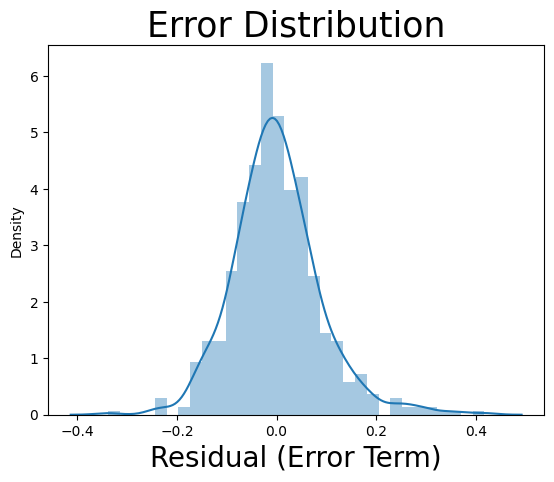

In [95]:
#1. Assumption of Normally Distributed Error Term

# Plot the histogram of the error terms
sns.distplot(residual)
plt.xlabel('Residual (Error Term)', fontdict={'fontsize': 20})
plt.title('Error Distribution', fontdict={'fontsize': 25})
plt.show()

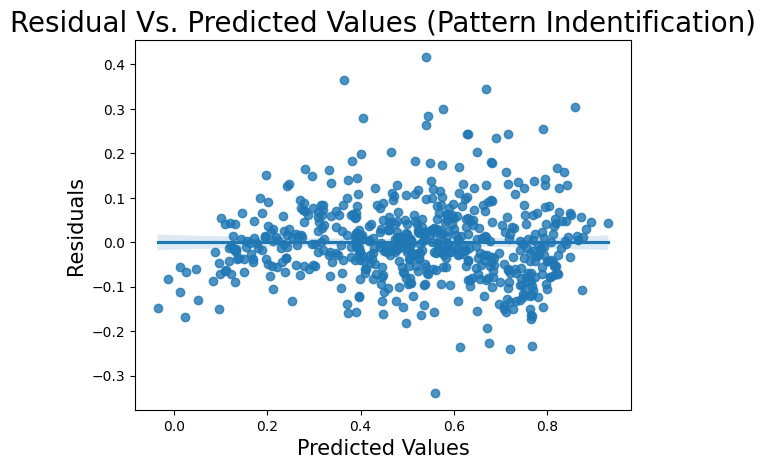

In [96]:
#2 Assumption dependent handled the assumption of Error Normal Distribution properly.

#Residual vs Predicted values

sns.regplot(x=y_train_pred, y=residual)
plt.title('Residual Vs. Predicted Values (Pattern Indentification)', fontdict={'fontsize': 20})
plt.xlabel('Predicted Values', fontdict={'fontsize': 15})
plt.ylabel('Residuals', fontdict={'fontsize': 15})
plt.show()

In [97]:
# there is almost no relation between Residual & Predicted Value

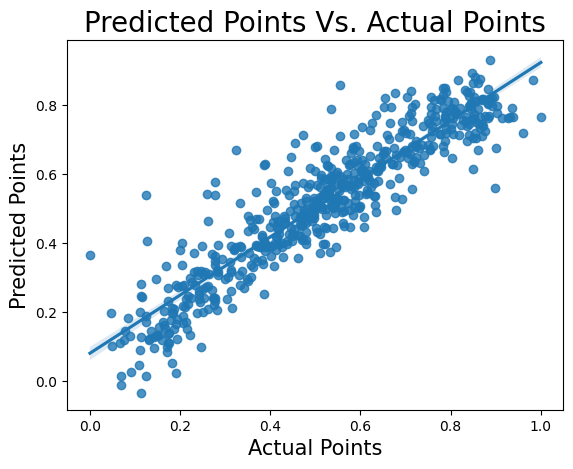

In [98]:
# 3. Homoscedasticity

sns.regplot(x=y_train, y=y_train_pred)
plt.title('Predicted Points Vs. Actual Points', fontdict={'fontsize': 20})
plt.xlabel('Actual Points', fontdict={'fontsize': 15})
plt.ylabel('Predicted Points', fontdict={'fontsize': 15})
plt.show()

In [99]:
 # variance is similar from both end of ine.

In [100]:
# Multicorrelation
calculateVIF(X_train_rfe4)

,Features,VIF
2,temp,5.12
3,windspeed,3.09
0,yr,2.00
4,Summer,1.84
7,August,1.55
5,Winter,1.49
11,Mist,1.48
8,September,1.30
9,Sunday,1.17
10,Light Snow,1.07


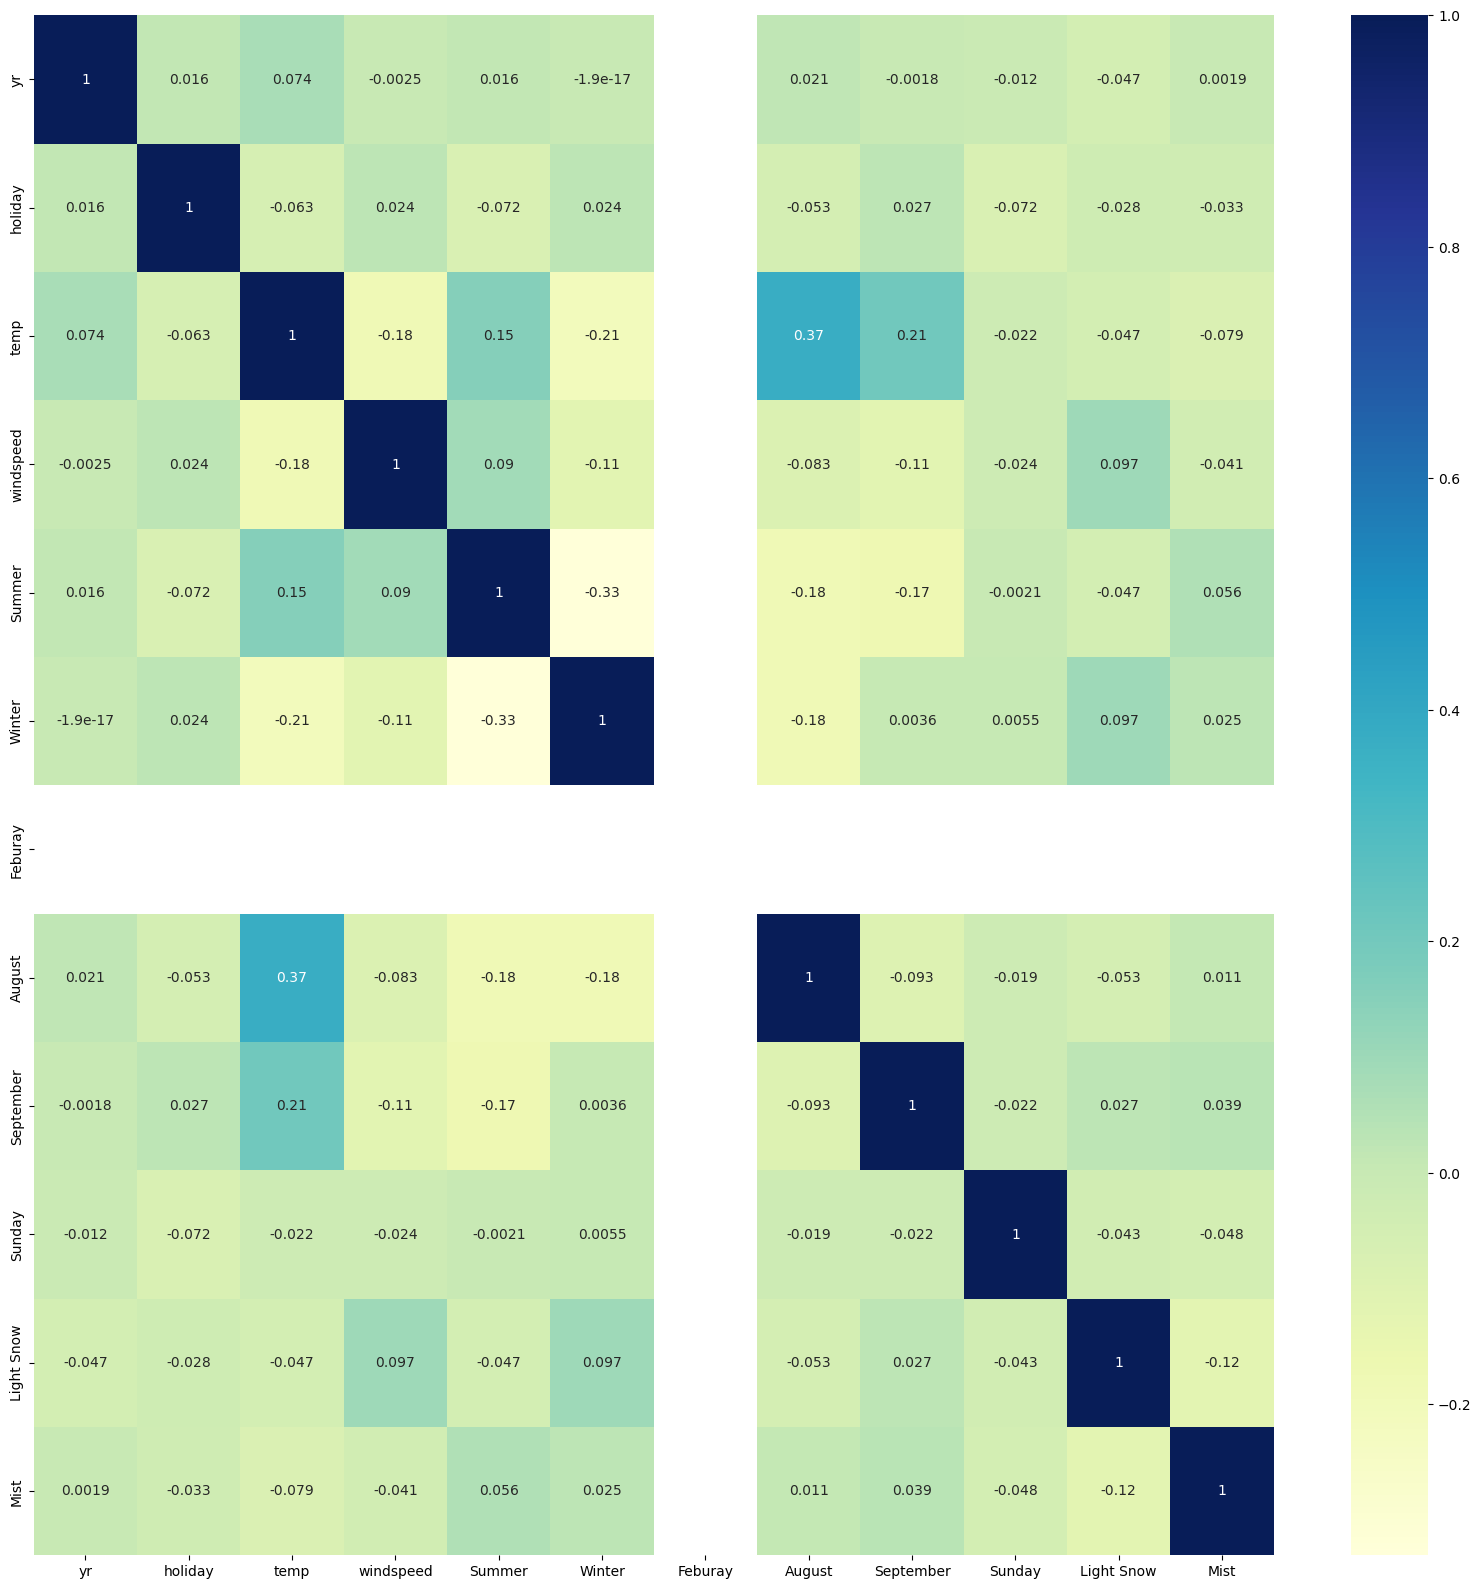

In [101]:
plt.figure(figsize = (20, 20))
# Heatmap
sns.heatmap(X_train_rfe4.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [102]:
# As per above analysis we didn't found multi-colinearity among independedt variables.

In [103]:
# model prediction 

In [104]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
data_test[num_vars] = scaler.transform(data_test[num_vars])
data_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,November,December,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Mist
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,0,0,0,1,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,...,0,0,0,0,0,1,0,0,0,0


In [105]:
data_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,November,December,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Mist
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,...,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,0.445205,0.034247,0.746575,0.569603,0.542752,0.635933,0.315127,0.517368,0.226027,0.273973,...,0.089041,0.075342,0.123288,0.116438,0.102740,0.171233,0.178082,0.089041,0.034247,0.315068
std,0.498699,0.182488,0.436469,0.238088,0.222120,0.156357,0.161524,0.212757,0.419697,0.447530,...,0.285783,0.264852,0.329899,0.321854,0.304664,0.378009,0.383899,0.285783,0.182488,0.466142
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.055683,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.250000,0.359075,0.346732,0.534457,0.196160,0.391251,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.560248,0.544652,0.614856,0.306383,0.508916,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.801929,0.743337,0.730570,0.411976,0.649994,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.800793,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [106]:
# divie into x and y
y_test = data_test.pop('cnt')
X_test = data_test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146 entries, 184 to 360
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          146 non-null    int64  
 1   holiday     146 non-null    int64  
 2   workingday  146 non-null    int64  
 3   temp        146 non-null    float64
 4   atemp       146 non-null    float64
 5   hum         146 non-null    float64
 6   windspeed   146 non-null    float64
 7   Spring      146 non-null    uint8  
 8   Summer      146 non-null    uint8  
 9   Winter      146 non-null    uint8  
 10  Feburay     146 non-null    uint8  
 11  March       146 non-null    uint8  
 12  April       146 non-null    uint8  
 13  May         146 non-null    uint8  
 14  June        146 non-null    uint8  
 15  July        146 non-null    uint8  
 16  August      146 non-null    uint8  
 17  September   146 non-null    uint8  
 18  October     146 non-null    uint8  
 19  November    146 non-null   

In [107]:
X_test=X_test[X_train_rfe4.columns]
X_test_lr5 = sm.add_constant(X_test)
X_test_lr5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146 entries, 184 to 360
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   const       146 non-null    float64
 1   yr          146 non-null    int64  
 2   holiday     146 non-null    int64  
 3   temp        146 non-null    float64
 4   windspeed   146 non-null    float64
 5   Summer      146 non-null    uint8  
 6   Winter      146 non-null    uint8  
 7   Feburay     146 non-null    uint8  
 8   August      146 non-null    uint8  
 9   September   146 non-null    uint8  
 10  Sunday      146 non-null    uint8  
 11  Light Snow  146 non-null    uint8  
 12  Mist        146 non-null    uint8  
dtypes: float64(3), int64(2), uint8(8)
memory usage: 8.0 KB


In [108]:
y_test_pred = lr5.predict(X_test_lr5)
lr5.params

const         1.304051e-01
yr            2.293742e-01
holiday      -1.123780e-01
temp          5.374715e-01
windspeed    -1.500314e-01
Summer        1.023464e-01
Winter        1.445872e-01
Feburay       1.355751e-16
August        4.852605e-02
September     1.059223e-01
Sunday       -5.446957e-02
Light Snow   -2.929231e-01
Mist         -8.225776e-02
dtype: float64

In [109]:
#Generating Rsquare

In [110]:
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.7455926976636118

In [111]:
train_adjuested_r_2=0.841
train_r2=0.844

In [112]:
# n is number of rows in X

n = X_test.shape[0]
# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]
# We find the Adjusted R-squared using the formula

test_adjusted_r2 = 1-(1-train_r2)*(n-1)/(n-p-1)
test_adjusted_r2

0.8299248120300752

In [113]:
# Train R -square=0.844
# Test R-square =0.7795

# Train Adj-R-square=0.841
# Test Adj-R-square=0.832

# Conclusion- That seems a very good model.